# KPCA - NON LINEAR


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset = dataset.values

In [3]:
# encoder the features categoriel 

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
LabelEncoder_feature_1 = LabelEncoder()
dataset[:,1] = LabelEncoder_feature_1.fit_transform(dataset[:,1])
dataset


array([[15624510, 1, 19.0, 19000.0, 0],
       [15810944, 1, 35.0, 20000.0, 0],
       [15668575, 0, 26.0, 43000.0, 0],
       ...,
       [15654296, 0, 50.0, 20000.0, 1],
       [15755018, 1, 36.0, 33000.0, 0],
       [15594041, 0, 49.0, 36000.0, 1]], dtype=object)

In [26]:
x = dataset[:,1:4]
y = dataset[:,-1]

In [5]:
# split the data 

In [28]:
# split our data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=0)

In [31]:
y_train= y_train.astype('int')

In [32]:
# scaling the training data 

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
# applaying KPCA

In [35]:
from sklearn.decomposition import KernelPCA

In [36]:
kpca = KernelPCA(n_components= 2, kernel="rbf")
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


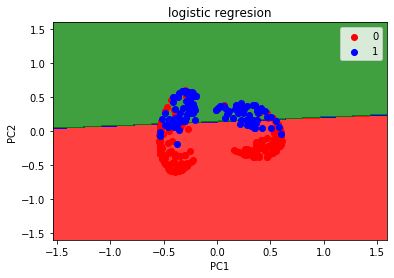

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

from matplotlib.colors import ListedColormap

x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start= x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                   (np.arange(start= x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01)))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap=ListedColormap(("red","blue","green")))


plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(("red","blue","green"))(i),label=j)
plt.title("logistic regresion")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()